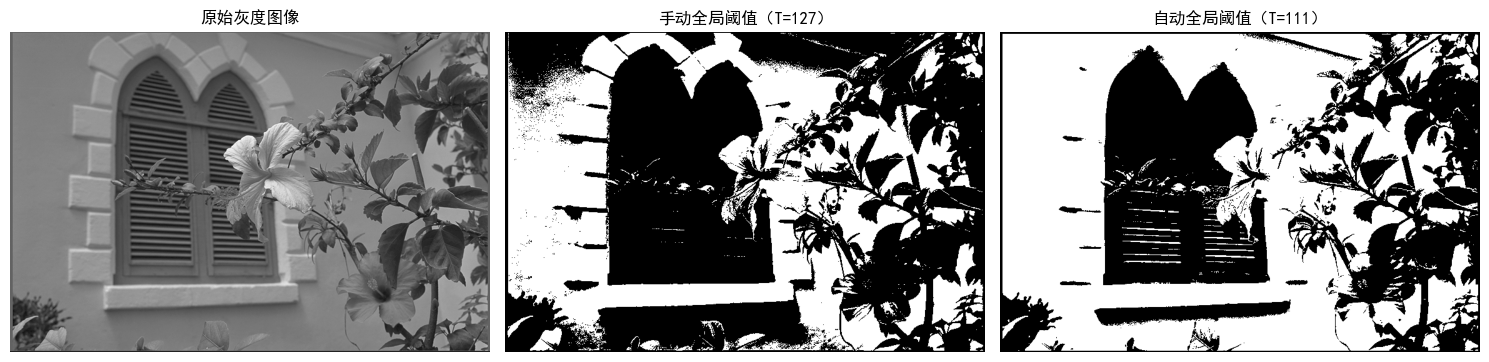

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取灰度图像
img = cv2.imread("test.jpg", cv2.IMREAD_GRAYSCALE)

# 容错处理：读取失败生成模拟图像
if img is None:
    print("警告：读取图片失败，自动生成模拟灰度图")
    img = np.uint8(np.random.normal(127, 50, (400, 400)))
    img = np.clip(img, 0, 255)

# 1. 手动全局阈值化（阈值T=127，可自行调整）
T_manual = 127
_, img_global_manual = cv2.threshold(img, T_manual, 255, cv2.THRESH_BINARY)

# 2. 自动全局阈值化（以图像平均灰度作为阈值）
T_auto = np.mean(img).astype(np.uint8)
_, img_global_auto = cv2.threshold(img, T_auto, 255, cv2.THRESH_BINARY)

# 结果可视化
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 绘制图像
axes[0].imshow(img, cmap="gray")
axes[0].set_title("原始灰度图像")
axes[0].axis("off")

axes[1].imshow(img_global_manual, cmap="gray")
axes[1].set_title(f"手动全局阈值（T={T_manual}）")
axes[1].axis("off")

axes[2].imshow(img_global_auto, cmap="gray")
axes[2].set_title(f"自动全局阈值（T={T_auto}）")
axes[2].axis("off")

plt.tight_layout()
plt.show()

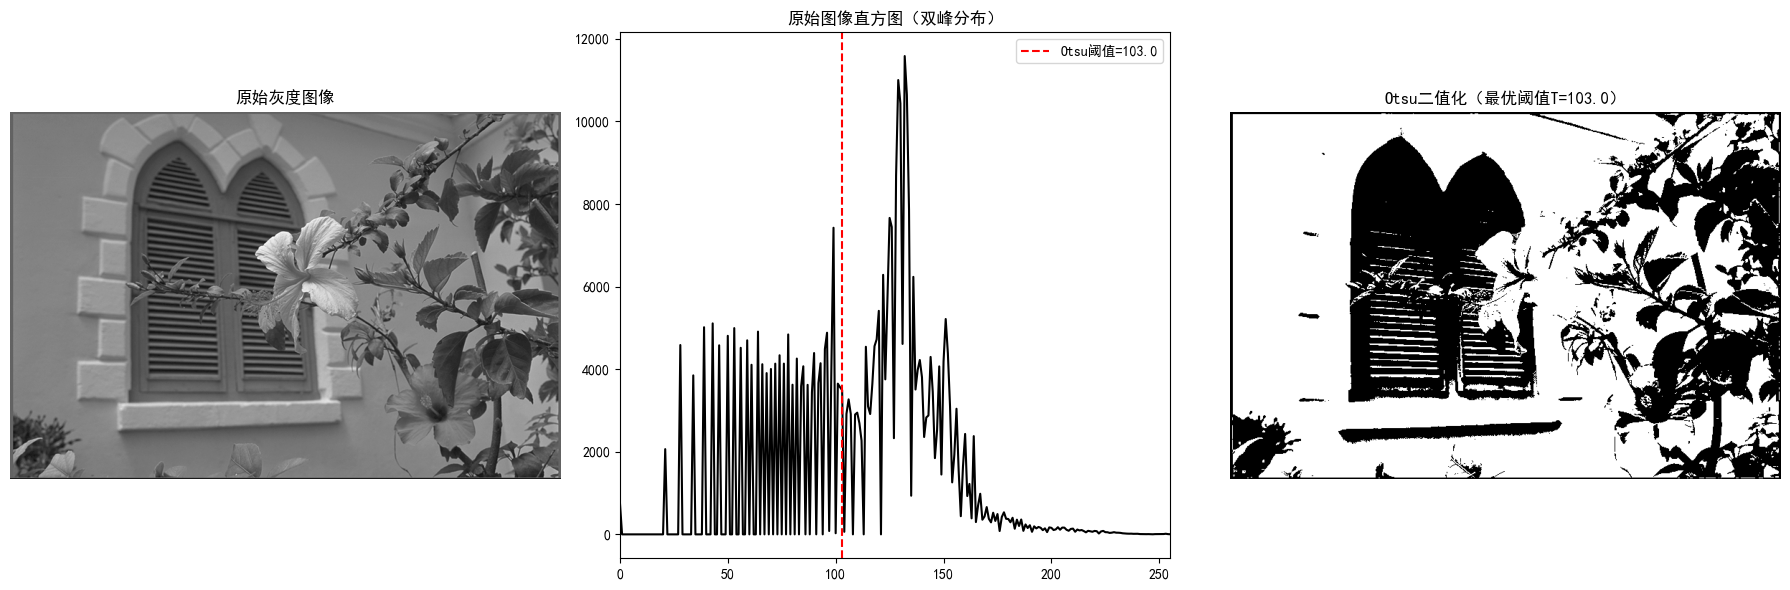

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取灰度图像
img = cv2.imread("test.jpg", cv2.IMREAD_GRAYSCALE)

# 容错处理：读取失败生成模拟图像（双峰分布，适配Otsu）
if img is None:
    print("警告：读取图片失败，自动生成双峰分布模拟图")
    img1 = np.uint8(np.random.normal(80, 20, (400, 200)))
    img2 = np.uint8(np.random.normal(200, 20, (400, 200)))
    img = np.hstack((img1, img2))
    img = np.clip(img, 0, 255)

# Otsu阈值化（自动寻找最优阈值）
# 返回值：ret=最优Otsu阈值，img_otsu=二值化图像
ret_otsu, img_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 计算原始图像直方图（用于验证双峰分布）
hist, _ = np.histogram(img.flatten(), bins=256, range=(0, 256))

# 结果可视化
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 绘制图像
axes[0].imshow(img, cmap="gray")
axes[0].set_title("原始灰度图像")
axes[0].axis("off")

axes[1].plot(hist, color="black")
axes[1].set_title("原始图像直方图（双峰分布）")
axes[1].set_xlim([0, 255])
axes[1].axvline(x=ret_otsu, color="red", linestyle="--", label=f"Otsu阈值={ret_otsu}")
axes[1].legend()

axes[2].imshow(img_otsu, cmap="gray")
axes[2].set_title(f"Otsu二值化（最优阈值T={ret_otsu}）")
axes[2].axis("off")

plt.tight_layout()
plt.show()

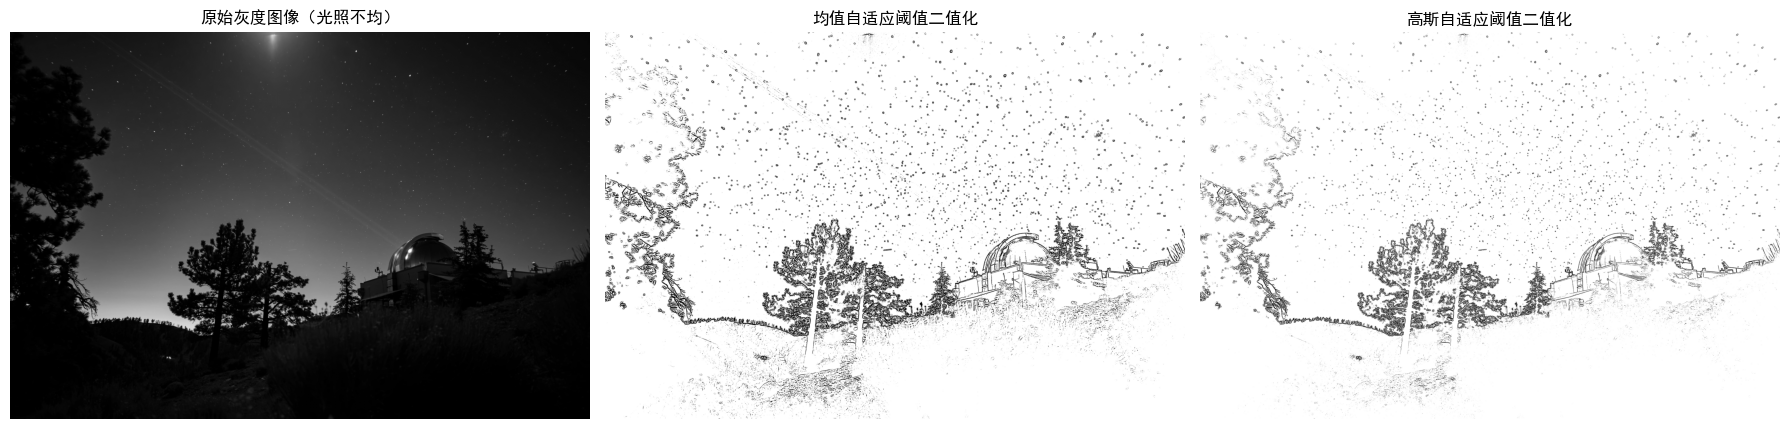

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取灰度图像
img = cv2.imread("test2.jpg", cv2.IMREAD_GRAYSCALE)

# 容错处理：读取失败生成光照不均模拟图（适配自适应阈值）
if img is None:
    print("警告：读取图片失败，自动生成光照不均模拟图")
    img = np.uint8(np.zeros((400, 600)))
    img[:, :200] = np.random.normal(80, 10, (400, 200))
    img[:, 200:400] = np.random.normal(150, 10, (400, 200))
    img[:, 400:] = np.random.normal(220, 10, (400, 200))
    img = np.clip(img, 0, 255)

# 1. 均值自适应阈值化
# blockSize=邻域窗口大小（必须为奇数），C=常数（从平均值中减去的数值）
img_adaptive_mean = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=15, C=2
)

# 2. 高斯自适应阈值化
img_adaptive_gauss = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize=15, C=2
)

# 结果可视化
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 绘制图像
axes[0].imshow(img, cmap="gray")
axes[0].set_title("原始灰度图像（光照不均）")
axes[0].axis("off")

axes[1].imshow(img_adaptive_mean, cmap="gray")
axes[1].set_title("均值自适应阈值二值化")
axes[1].axis("off")

axes[2].imshow(img_adaptive_gauss, cmap="gray")
axes[2].set_title("高斯自适应阈值二值化")
axes[2].axis("off")

plt.tight_layout()
plt.show()